In [39]:
#!python
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy
import os
import matplotlib
import pylab
#from matplotlib import numerix as N 


In [ ]:
##This is 

In [11]:
ls=os.listdir()
path_img='data/DIR_Needle/'

In [17]:
ls_pines=os.listdir(path_img)
ls_pines[1]

['D2526.jpg',
 'D2528_pt1.jpg',
 'D2528_pt2.jpg',
 'D2530_pt1.jpg',
 'D2530_pt2.jpg',
 'D2533.jpg',
 'D2546_pt1.jpg',
 'D2546_pt2.jpg',
 'D2547.jpg',
 'D2548.jpg',
 'D2554_pt1.jpg',
 'D2554_pt2.jpg',
 'D2566_pt1.jpg',
 'D2566_pt2.jpg',
 'D2582_pt1.jpg',
 'D2582_pt2.jpg',
 'W4519_pt1.jpg',
 'W4519_pt2.jpg']

In [28]:
path_img+ls_pines[1]
I=cv2.imread(path_img+ls_pines[1])
I

array([[[156, 151, 136],
        [154, 149, 134],
        [153, 148, 133],
        ..., 
        [108, 113, 114],
        [108, 113, 114],
        [109, 114, 115]],

       [[162, 157, 142],
        [163, 158, 143],
        [164, 159, 144],
        ..., 
        [250, 255, 255],
        [250, 255, 255],
        [250, 255, 255]],

       [[171, 168, 154],
        [173, 170, 156],
        [175, 172, 158],
        ..., 
        [245, 250, 251],
        [246, 251, 252],
        [247, 252, 253]],

       ..., 
       [[250, 255, 254],
        [250, 255, 254],
        [250, 255, 254],
        ..., 
        [246, 251, 249],
        [247, 252, 251],
        [246, 251, 250]],

       [[250, 255, 254],
        [250, 255, 254],
        [250, 255, 254],
        ..., 
        [245, 250, 248],
        [246, 251, 250],
        [245, 250, 249]],

       [[250, 255, 254],
        [250, 255, 254],
        [250, 255, 254],
        ..., 
        [245, 250, 248],
        [246, 251, 250],
        [245, 250,

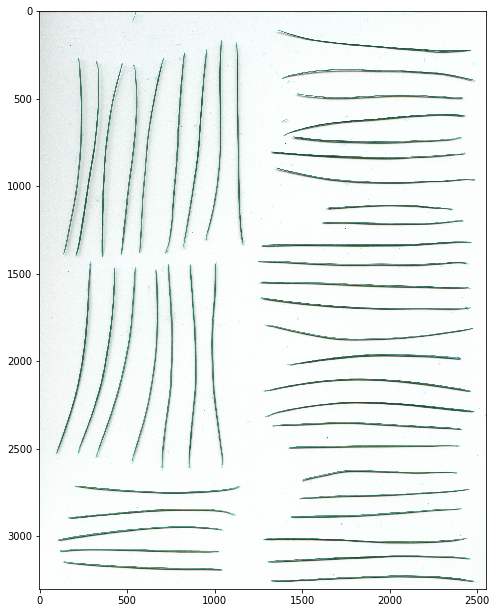

In [57]:
plt.figure(figsize=(8,20))
plt.imshow(I)

In [61]:
frame = I

if frame is None:
    print('Error loading image')
    exit()

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
ret, frame = cv2.threshold(frame, 127, 255, cv2.THRESH_BINARY)

frame, contours, hierarchy = cv2.findContours(frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

areas = []

for i in range(0, len(contours)):
    areas.append(cv2.contourArea(contours[i]))

mass_centres_x = []
mass_centres_y = []

for i in range(0, len(contours)):
    M = cv2.moments(contours[i], 0)
    mass_centres_x.append(int(M['m10']/M['m00']))
    mass_centres_y.append(int(M['m01']/M['m00']))

print('Num particles: ', len(contours))

for i in range(0, len(contours)):
    print('Area', (i + 1), ':', areas[i])

for i in range(0, len(contours)):
    print('Centre',(i + 1),':', mass_centres_x[i], mass_centres_y[i])    

cv2.imshow("Frame", frame)

cv2.waitKey(0)

ZeroDivisionError: float division by zero

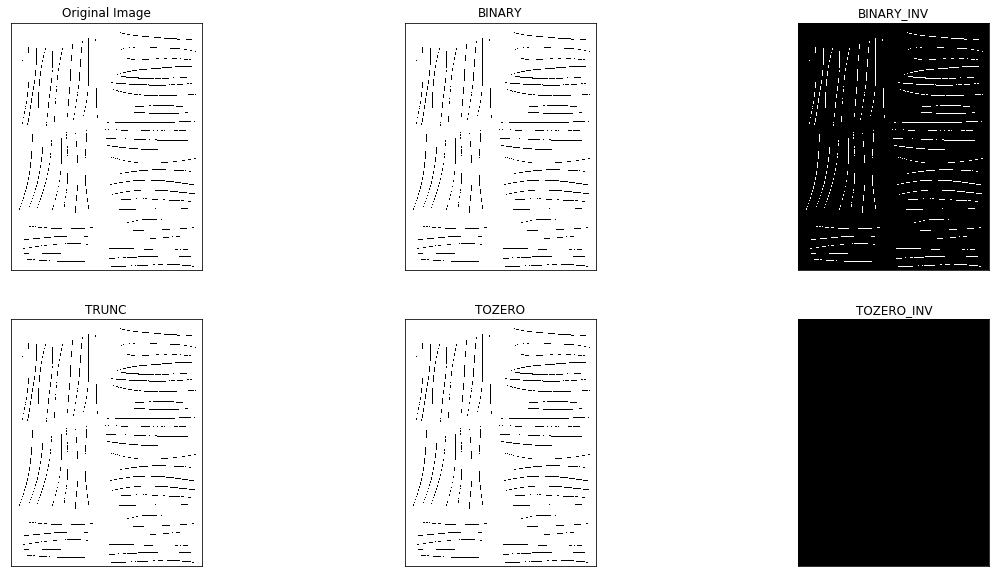

In [76]:
img = frame
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
fig = plt.figure()
plt.savefig('foo.png')

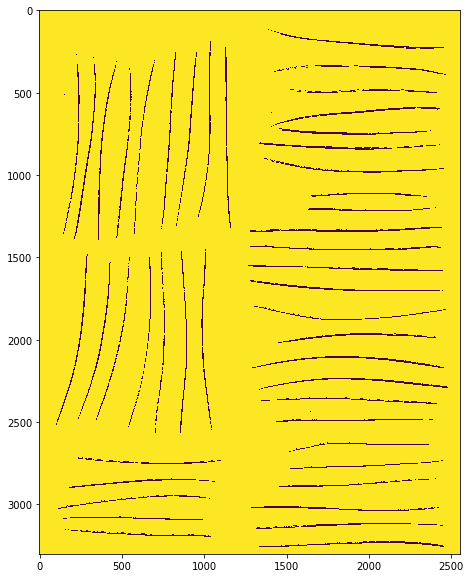

In [67]:
plt.imshow(frame)

0.0